In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imageio.v3 as iio
import skimage as ski
import cv2
import os
from scipy.ndimage import label, center_of_mass


In [3]:
import glob
import pandas as pd

In [1]:
%cd D:\Europhotonics Masters\MATLAB\LAM\03_april

D:\Europhotonics Masters\MATLAB\LAM\03_april


499
249
124
62
31
15
7
Standard deviation:  [0.0037119510081392703, 0.0025402379305372136, 0.0021874286906560436, 0.002342615030431004, 0.0028357839807785002, 0.001999812686337659, 0.0024696063563968145, 0.0012559653576400258]


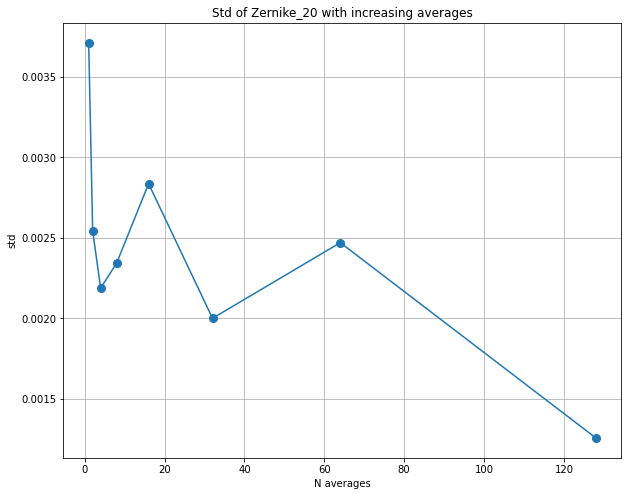

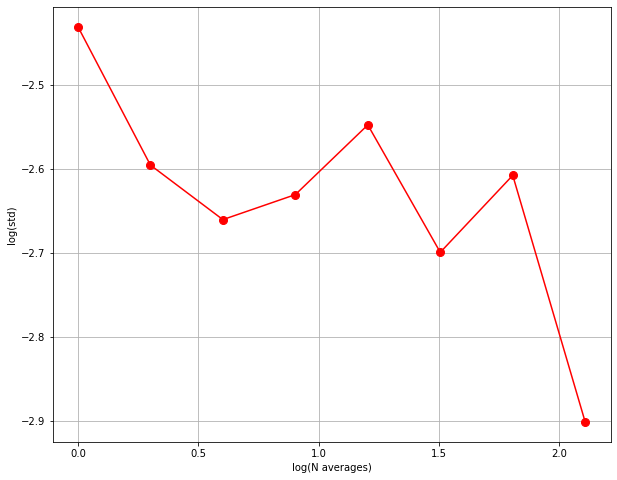

In [9]:
# Read an Excel file
df = pd.read_excel("zernike_coefficients.xlsx")  # Reads the first sheet by default

c = df.iloc[4:, 14]
avg = np.mean(c)
stdd = [np.std(c)]
N = len(c)
data = np.copy(c)
new_data = []

while N>=10:
    for i in range(N//2):
        a = np.mean([c[i+4], c[N+4-(i+1)]])
        new_data.append(a)
    stdd.append(np.std(new_data))
    N = len(new_data)
    print(N)
    data = np.copy(new_data)
    new_data.clear()
# print('Average phase value for pixel (',y,',',x,') is ',avg)
print('Standard deviation: ',stdd)
plt.figure(figsize=(10,8))
x1 = np.linspace(0,len(stdd)-1,len(stdd))
x_axis1 = 2**x1
plt.plot(x_axis1, stdd,marker='o', markersize=8)
plt.grid()
plt.title('Std of Zernike_20 with increasing averages')
plt.xlabel('N averages')
plt.ylabel('std')
plt.show()


plt.figure(figsize=(10,8))
plt.plot(np.log10(x_axis1), np.log10(stdd),marker='o', color='red', markersize=8)
# plt.ylim(-2.0,0.0)
plt.grid('True')
plt.ylabel('log(std)')
plt.xlabel('log(N averages)')
plt.show()

In [6]:
avg = np.mean(defocus)
stdd = [np.std(defocus)]
N = len(defocus)
data = np.copy(defocus)
new_data = []

while N>=10:
    for i in range(N//2):
        a = np.mean([defocus[i], defocus[(N)-(i+1)]])
        new_data.append(a)
    stdd.append(np.std(new_data))
    N = len(new_data)
    print(N)
    data = np.copy(new_data)
    new_data.clear()

500
250
125
62
31
15
7


Standard deviation:  [0.011997052018742809, 0.00843091928182682, 0.00948054817457729, 0.010680014608826902, 0.013079312934279917, 0.00515035093878285, 0.0059058186780568045, 0.005914801095731337]


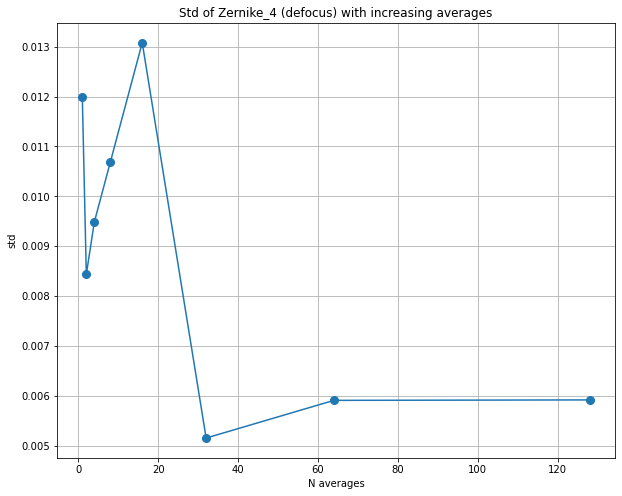

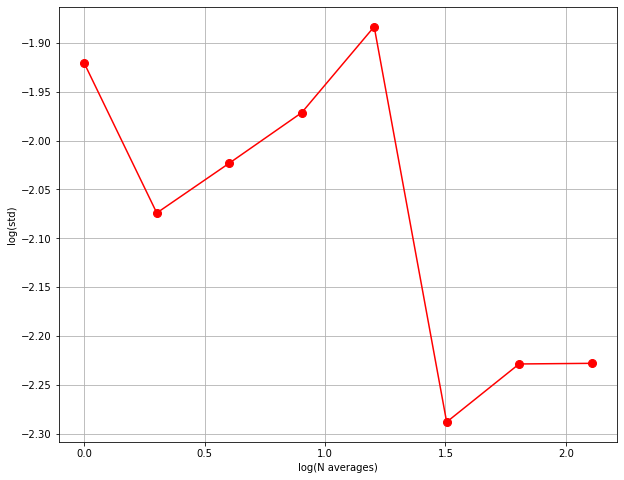

In [7]:
# print('Average phase value for pixel (',y,',',x,') is ',avg)
print('Standard deviation: ',stdd)
plt.figure(figsize=(10,8))
x1 = np.linspace(0,len(stdd)-1,len(stdd))
x_axis1 = 2**x1
plt.plot(x_axis1, stdd,marker='o', markersize=8)
plt.grid()
plt.title('Std of Zernike_4 (defocus) with increasing averages')
plt.xlabel('N averages')
plt.ylabel('std')
plt.show()


plt.figure(figsize=(10,8))
plt.plot(np.log10(x_axis1), np.log10(stdd),marker='o', color='red', markersize=8)
# plt.ylim(-2.0,0.0)
plt.grid('True')
plt.ylabel('log(std)')
plt.xlabel('log(N averages)')
plt.show()

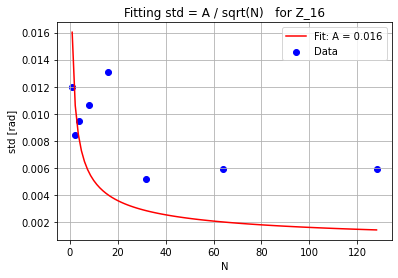

Here, 0.01rad~1nm
For std = 0.1rad, corresponding N = 0
For std = 0.01rad, corresponding N = 3
For std = 0.001rad, corresponding N = 257
For std = 0.0001rad, corresponding N = 25666


In [8]:
from scipy.optimize import curve_fit

N = x_axis1;
y = stdd


# Define the model function y = A / sqrt(N)
def model(N, A):
    return A / np.sqrt(N)

# Perform curve fitting
A_opt, _ = curve_fit(model, N, y, p0=[1])  # Initial guess A=1
A_fit = A_opt[0]
# Generate fitted curve
N_fit = np.linspace(min(N), max(N), 100)  # Smooth range for plotting
y_fit = model(N_fit, A_fit)

# Plot results
plt.scatter(N, y, color='blue', label='Data')  # Original data points
plt.plot(N_fit, y_fit, 'r-', label=f'Fit: A = {A_fit:.3f}')  # Fitted curve
plt.xlabel('N')
plt.ylabel('std [rad]')
plt.legend()
plt.grid()
plt.title('Fitting std = A / sqrt(N)   for Z_16')
plt.show()

# from this fit now let's try to find the the values of N for which I could reach 1nm, 100pm, 10pm, 1pm ?
y_target = [0.1, 0.01, 0.001, 0.0001]   # Target std values
N_target = (A_fit/y_target)**2   # Compute corresponding N
print('Here, 0.01rad~1nm')
print(f'For std = {y_target[0]}rad, corresponding N = {round(N_target[0])}')
print(f'For std = {y_target[1]}rad, corresponding N = {round(N_target[1])}')
print(f'For std = {y_target[2]}rad, corresponding N = {round(N_target[2])}')
print(f'For std = {y_target[3]}rad, corresponding N = {round(N_target[3])}')

In [24]:
## plotting the defocus term for different averaging values
# Read an Excel file
df = pd.read_excel("Zernike_coefficients_cropped.xlsx")  # Reads the first sheet by default
x_tilt = df.iloc[:, 1]
print(x_tilt)


0     -0.237720
1     -0.271601
2     -0.296338
3     -0.335761
4     -0.310734
         ...   
995   -0.114599
996   -0.127571
997   -0.115816
998   -0.113465
999   -0.075355
Name: -0.2736877983908022, Length: 1000, dtype: float64


In [60]:
# Read an Excel file
df = pd.read_excel("Zernike_coefficients_cropped.xlsx")  # Reads the first sheet by default

z_6 = df.iloc[:, 5]

z_11 = df.iloc[:, 10]

z_16 = df.iloc[:, 15]

z_21 = df.iloc[:, 20]


In [62]:
avg = np.mean(z_6)
stdd_6 = [np.std(z_6)]
N = len(z_6)
data = np.copy(z_6)
new_data = []

while N>=10:
    for i in range(N//2):
        a = np.mean([z_6[i], z_6[(N)-(i+1)]])
        new_data.append(a)
    stdd_6.append(np.std(new_data))
    N = len(new_data)
    print(N)
    data = np.copy(new_data)
    new_data.clear()
    
avg = np.mean(z_11)
stdd_11 = [np.std(z_11)]
N = len(z_11)
data = np.copy(z_11)
new_data = []

while N>=10:
    for i in range(N//2):
        a = np.mean([z_11[i], z_11[(N)-(i+1)]])
        new_data.append(a)
    stdd_11.append(np.std(new_data))
    N = len(new_data)
    print(N)
    data = np.copy(new_data)
    new_data.clear()
    
avg = np.mean(z_16)
stdd_16 = [np.std(z_16)]
N = len(z_16)
data = np.copy(z_16)
new_data = []

while N>=10:
    for i in range(N//2):
        a = np.mean([z_16[i], z_16[(N)-(i+1)]])
        new_data.append(a)
    stdd_16.append(np.std(new_data))
    N = len(new_data)
    print(N)
    data = np.copy(new_data)
    new_data.clear()
    
avg = np.mean(z_21)
stdd_21 = [np.std(z_21)]
N = len(z_21)
data = np.copy(z_21)
new_data = []

while N>=10:
    for i in range(N//2):
        a = np.mean([z_21[i], z_21[(N)-(i+1)]])
        new_data.append(a)
    stdd_21.append(np.std(new_data))
    N = len(new_data)
    print(N)
    data = np.copy(new_data)
    new_data.clear()

500
250
125
62
31
15
7
500
250
125
62
31
15
7
500
250
125
62
31
15
7
500
250
125
62
31
15
7


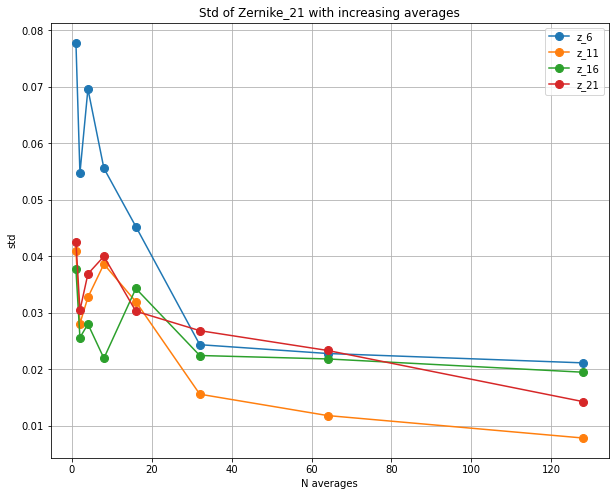

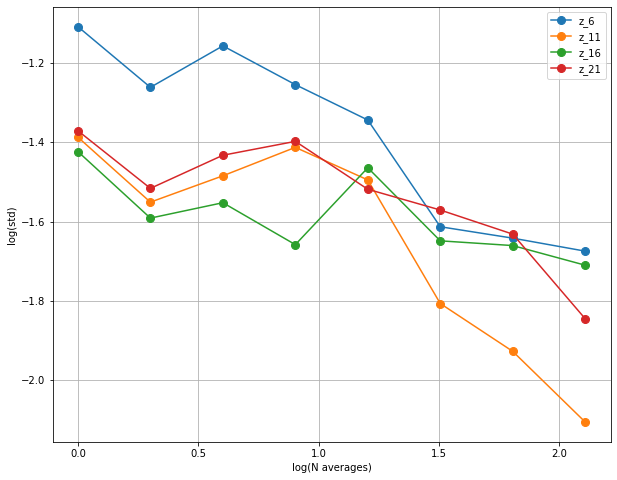

In [68]:
# print('Average phase value for pixel (',y,',',x,') is ',avg)
plt.figure(figsize=(10,8))
x1 = np.linspace(0,len(stdd_21)-1,len(stdd_21))
x_axis1 = 2**x1
plt.plot(x_axis1, stdd_6,marker='o', markersize=8, label='z_6')
plt.plot(x_axis1, stdd_11,marker='o', markersize=8, label='z_11')
plt.plot(x_axis1, stdd_16,marker='o', markersize=8, label='z_16')
plt.plot(x_axis1, stdd_21,marker='o', markersize=8, label='z_21')
plt.grid()
plt.title('Std of Zernike_21 with increasing averages')
plt.xlabel('N averages')
plt.ylabel('std')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(np.log10(x_axis1), np.log10(stdd_6),marker='o', markersize=8, label='z_6')
plt.plot(np.log10(x_axis1), np.log10(stdd_11),marker='o', markersize=8, label='z_11')
plt.plot(np.log10(x_axis1), np.log10(stdd_16),marker='o', markersize=8, label='z_16')
plt.plot(np.log10(x_axis1), np.log10(stdd_21),marker='o', markersize=8, label='z_21')
# plt.ylim(-2.0,0.0)
plt.grid('True')
plt.ylabel('log(std)')
plt.xlabel('log(N averages)')
plt.legend()
plt.show()

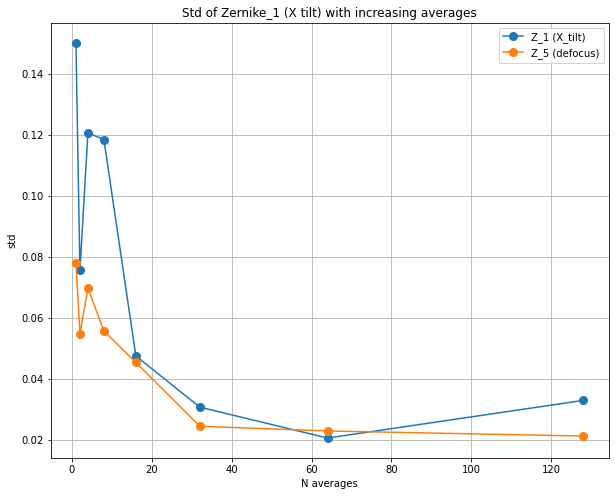

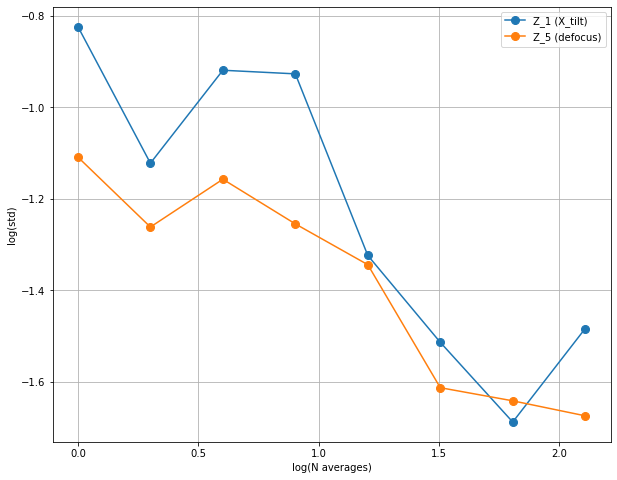

In [36]:
plt.figure(figsize=(10,8))
plt.plot(x_axis1, stdd2, marker='o', markersize=8, label='Z_1 (X_tilt)')
plt.plot(x_axis1, stdd, marker='o', markersize=8, label='Z_5 (defocus)')
plt.grid()
plt.title('Std of Zernike_1 (X tilt) with increasing averages')
plt.xlabel('N averages')
plt.ylabel('std')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.plot(np.log10(x_axis1), np.log10(stdd2),marker='o', markersize=8, label='Z_1 (X_tilt)')
plt.plot(np.log10(x_axis1), np.log10(stdd),marker='o', markersize=8, label='Z_5 (defocus)')
# plt.ylim(-2.0,0.0)
plt.grid('True')
plt.ylabel('log(std)')
plt.xlabel('log(N averages)')
plt.legend()
plt.show()

### Analysing the data

In [7]:
%cd D:\Europhotonics Masters\MATLAB\LAM\21March\testt

D:\Europhotonics Masters\MATLAB\LAM\21March\testt


498
249
124
62
31
15
7
Standard deviation:  [0.0036484334219514442, 0.0025524443298341115, 0.002128939091457197, 0.0014821202856391304, 0.0015439387125721605, 0.001064054151955362, 0.000989017469792903, 0.0004772369453854303]


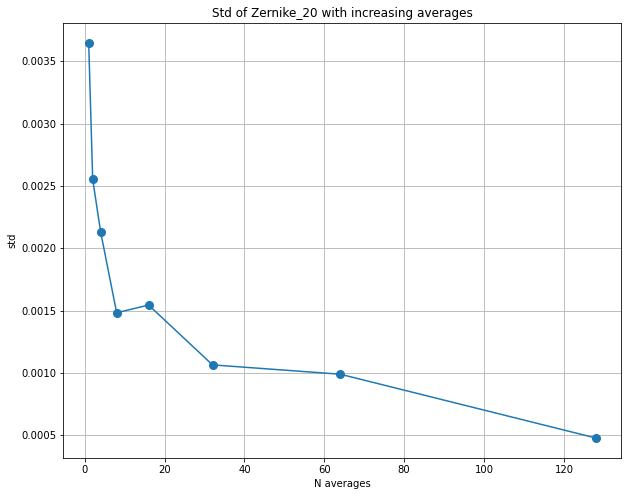

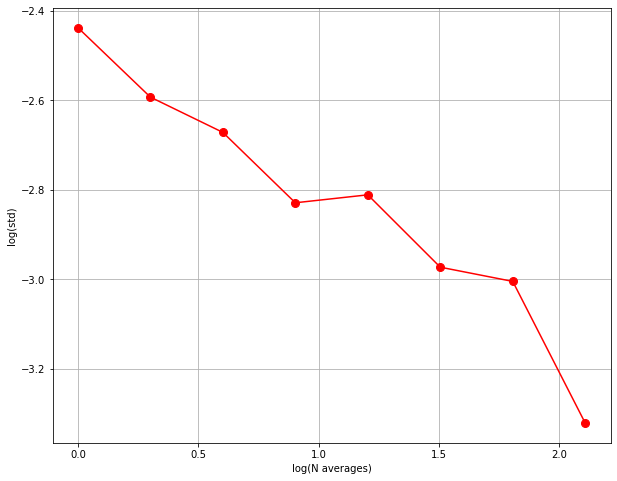

In [23]:
# Read an Excel file
df = pd.read_excel("zernike_coefficients_950.xlsx")  # Reads the first sheet by default

c = df.iloc[4:, 17]

avg = np.mean(c)
stdd = [np.std(c)]
N = len(c)
data = np.copy(c)
new_data = []

while N>=10:
    for i in range(N//2):
        a = np.mean([c[i+4], c[N+4-(i+1)]])
        new_data.append(a)
    stdd.append(np.std(new_data))
    N = len(new_data)
    print(N)
    data = np.copy(new_data)
    new_data.clear()
# print('Average phase value for pixel (',y,',',x,') is ',avg)
print('Standard deviation: ',stdd)
plt.figure(figsize=(10,8))
x1 = np.linspace(0,len(stdd)-1,len(stdd))
x_axis1 = 2**x1
plt.plot(x_axis1, stdd,marker='o', markersize=8)
plt.grid()
plt.title('Std of Zernike_20 with increasing averages')
plt.xlabel('N averages')
plt.ylabel('std')
plt.show()


plt.figure(figsize=(10,8))
plt.plot(np.log10(x_axis1), np.log10(stdd),marker='o', color='red', markersize=8)
# plt.ylim(-2.0,0.0)
plt.grid('True')
plt.ylabel('log(std)')
plt.xlabel('log(N averages)')
plt.show()

Standard deviation for Z_0:  [0.0033668830261298546, 0.0024513471223894276, 0.002366690876738447, 0.0022504810735562665, 0.0021349904409955936, 0.001303622983233324, 0.0009410041917488394, 0.001291968913507359]


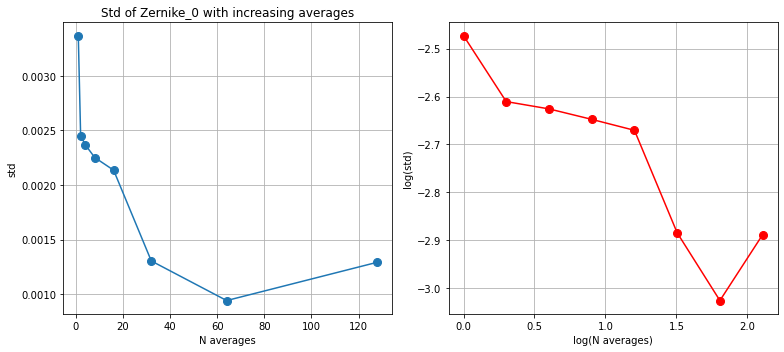

Standard deviation for Z_1:  [0.003074436762560305, 0.002015635795347788, 0.0020472854317535555, 0.0019686344485687463, 0.002320548085757816, 0.0016855093376683845, 0.0019624361277645608, 0.0023240754141404885]


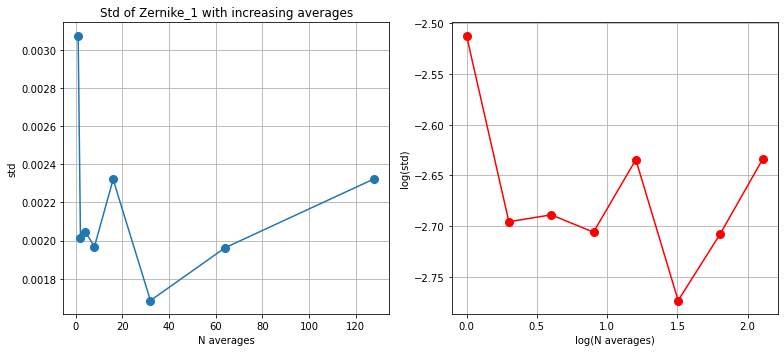

Standard deviation for Z_2:  [0.0032447921226131282, 0.002232005210938716, 0.0022558736095996215, 0.0021970963878995215, 0.002238742214135599, 0.0014874605950586514, 0.002183412212315596, 0.0014616526849524011]


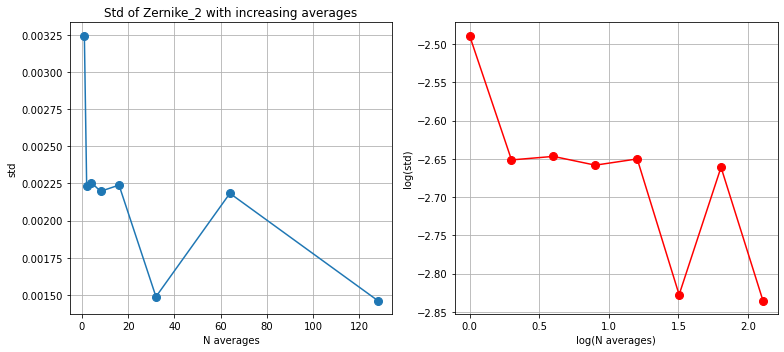

Standard deviation for Z_3:  [0.008288348650758648, 0.005727791030580606, 0.005739248786157402, 0.005399060081705786, 0.00564582691928272, 0.00428981867038292, 0.0037955002598105887, 0.004639878165184425]


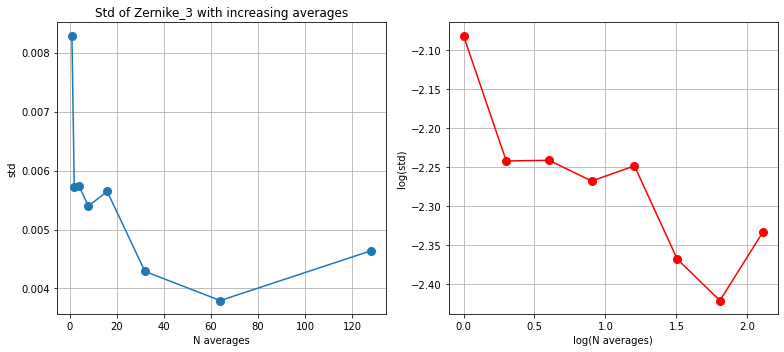

Standard deviation for Z_4:  [0.008158995147717304, 0.0055619816339346284, 0.005292641183070204, 0.0051837749905802874, 0.00627812444238308, 0.0033611386257639676, 0.004012184220872995, 0.00280540658772467]


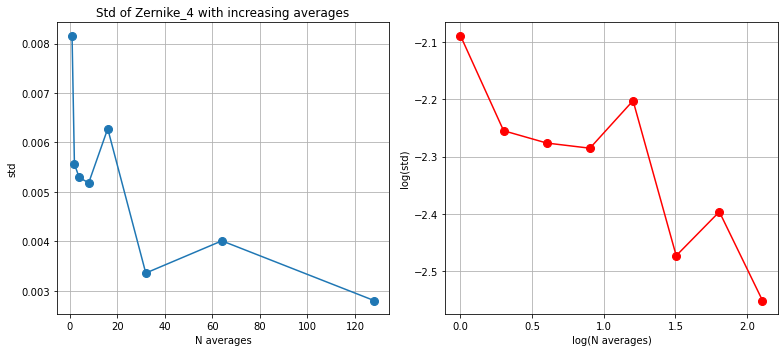

Standard deviation for Z_5:  [0.00804624004535999, 0.005828669804784453, 0.004757239201190296, 0.005113406152124715, 0.0055822965694769565, 0.005110346363836475, 0.004822297746464397, 0.004726931092264876]


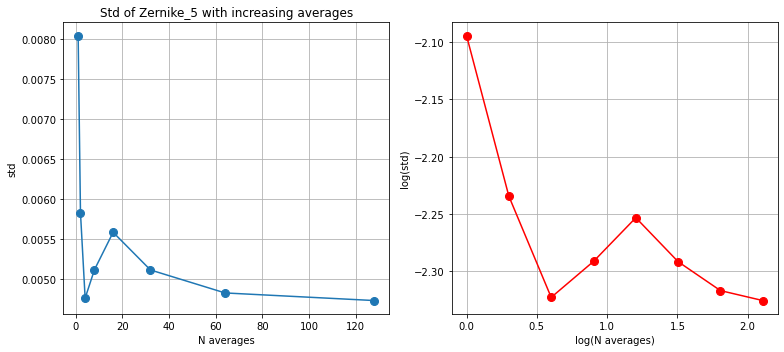

Standard deviation for Z_6:  [0.005982364957705849, 0.004061726030014608, 0.0043040655761948775, 0.004757129555488301, 0.00508523122511683, 0.002871722445204144, 0.0036687721227801656, 0.0032793416462230727]


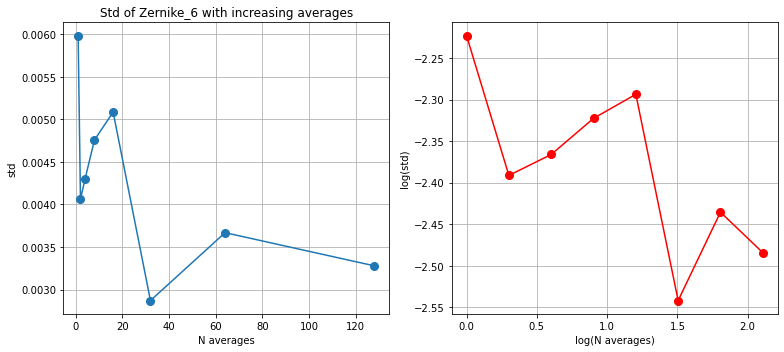

Standard deviation for Z_7:  [0.003222589063278465, 0.0022488975500457205, 0.0024223052118413735, 0.002095044727195343, 0.0025207809560753125, 0.002028329536243125, 0.002520824380149387, 0.0022952924316824615]


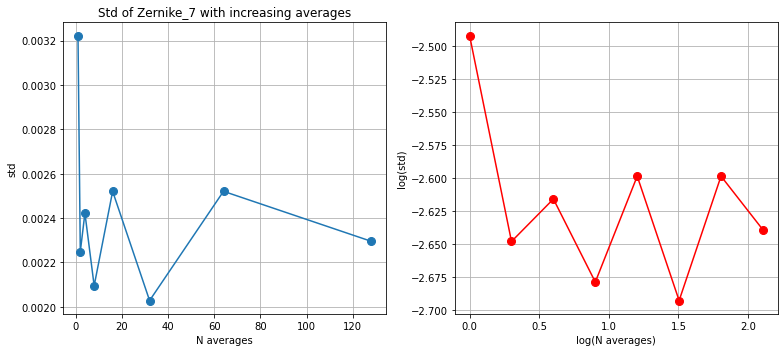

Standard deviation for Z_8:  [0.005094003680652375, 0.003682041636474045, 0.0031897890269146673, 0.0026013177479413045, 0.0025887967275083526, 0.0025864310140072413, 0.0030037125176835557, 0.0026064284735543876]


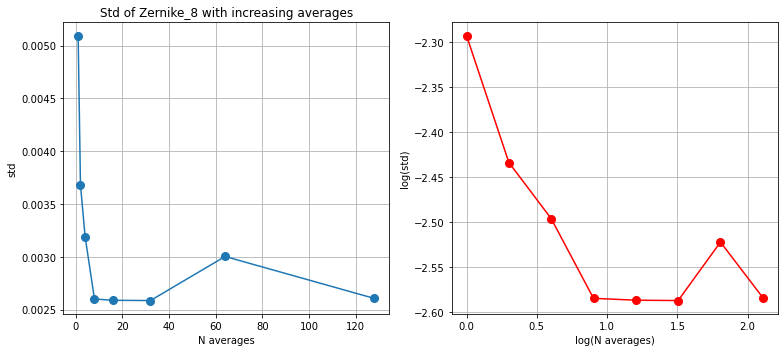

Standard deviation for Z_9:  [0.0048096056331220416, 0.0033192924152208128, 0.0037770360648874826, 0.003755096519388971, 0.004082971493591621, 0.0028802369396117135, 0.002902209885970038, 0.0027906001110140867]


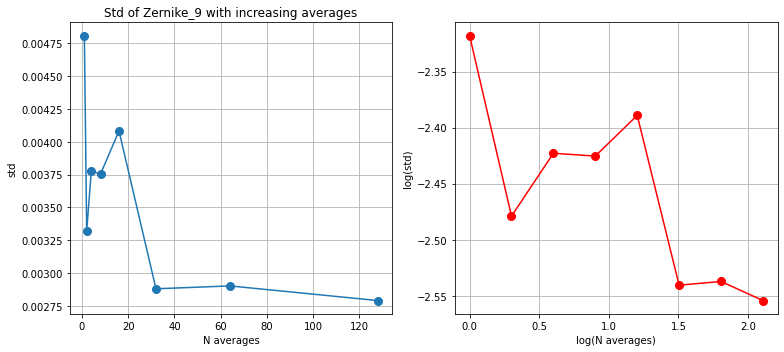

Standard deviation for Z_10:  [0.003240702369670464, 0.002143046392585033, 0.0020021918683948564, 0.001988221814096694, 0.0017912982302329776, 0.0019033064499043913, 0.0022848680973356476, 0.0016830487400026435]


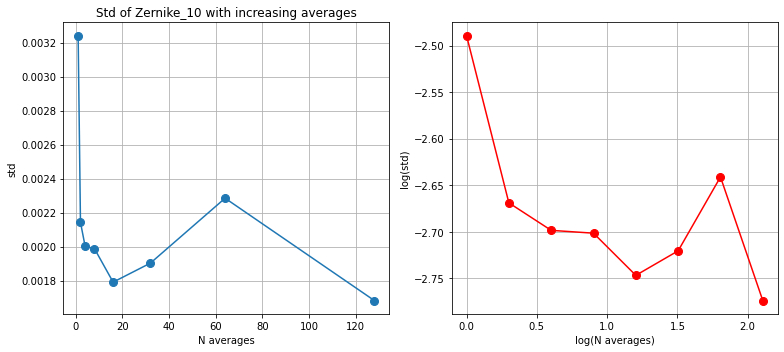

Standard deviation for Z_11:  [0.0031680148749205547, 0.002191147614141128, 0.0017840167947462578, 0.001796053156058043, 0.0020639118319220836, 0.001939835162547684, 0.0025199338615659473, 0.0011242230877456698]


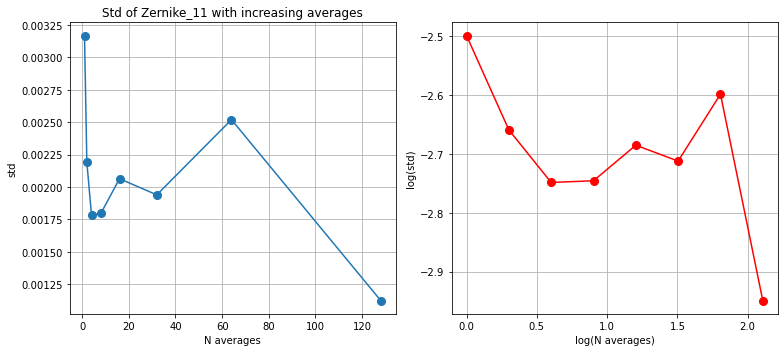

Standard deviation for Z_12:  [0.0022630658102624577, 0.0015518893804501723, 0.0014939230568880094, 0.0015124927976024108, 0.0018168658621026726, 0.0014320564374208083, 0.0020101796492408893, 0.0012044560123617156]


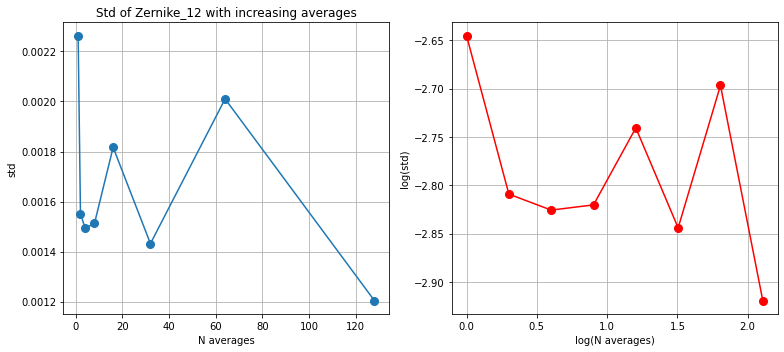

Standard deviation for Z_13:  [0.0037119510081392703, 0.0025402379305372136, 0.0021874286906560436, 0.002342615030431004, 0.0028357839807785002, 0.001999812686337659, 0.0024696063563968145, 0.0012559653576400258]


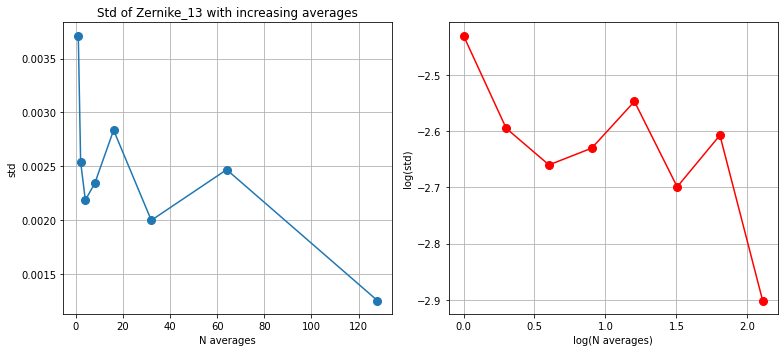

Standard deviation for Z_14:  [0.0029579271347357217, 0.0018637815407929856, 0.0018033716533682833, 0.0018640536787672458, 0.0017322477398022341, 0.0016174548679143582, 0.001636072533029429, 0.0012132348393902163]


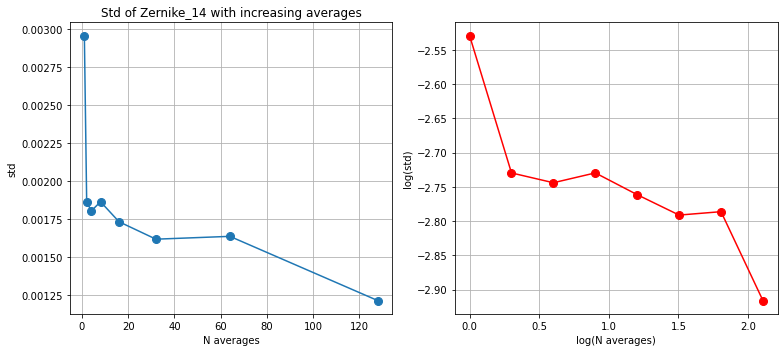

Standard deviation for Z_15:  [0.002174814648596052, 0.0012669132790960763, 0.001452943141863275, 0.001416634811214758, 0.001735123516071687, 0.0011037232419393393, 0.0011067771029234193, 0.001040555189329628]


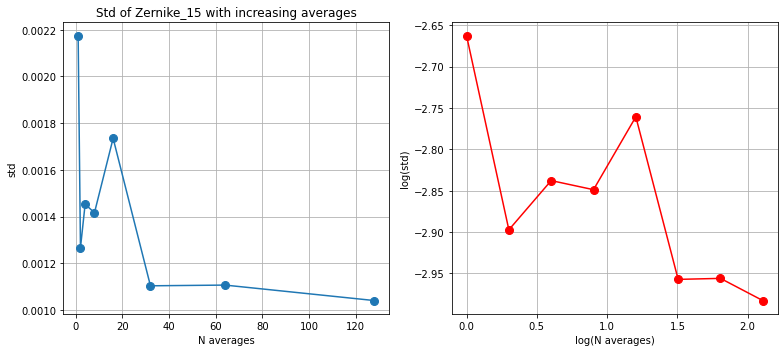

Standard deviation for Z_16:  [0.0032257189524180357, 0.0020547191964893356, 0.0017278529914507078, 0.001952962076971668, 0.0021756528078897765, 0.0023618609393387647, 0.002256856220497885, 0.002066175605473325]


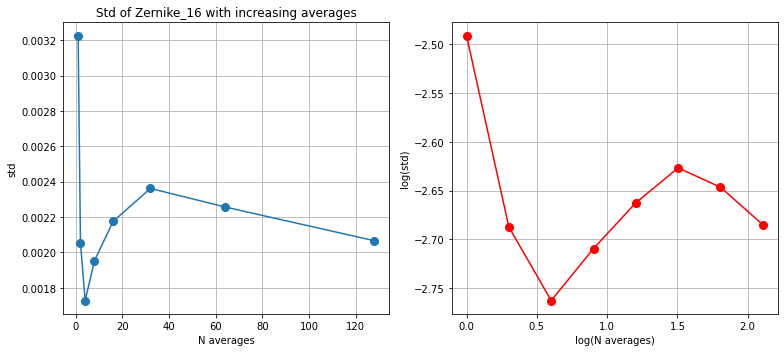

Standard deviation for Z_17:  [0.0023805793841382233, 0.001410589740004074, 0.0013100507486294001, 0.0013892380204901687, 0.0013691220973228544, 0.001344608070659872, 0.0011834225318494188, 0.0014787612024520901]


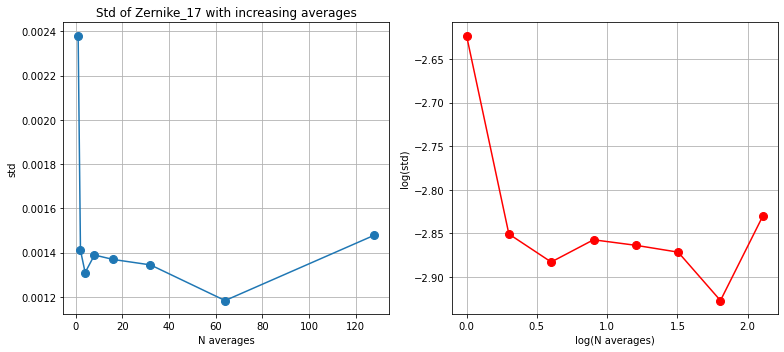

Standard deviation for Z_18:  [0.0030732072551196967, 0.0020130296082427183, 0.00159777573274238, 0.0016788162995199384, 0.0015132419319596583, 0.0018502439583782159, 0.0016726691909108092, 0.0011611043300694904]


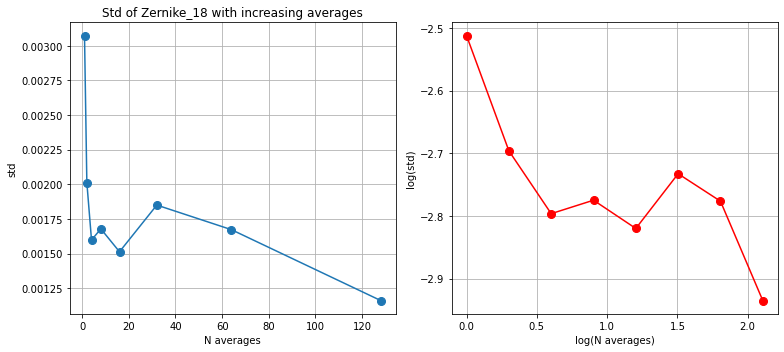

Standard deviation for Z_19:  [0.0024498705548414135, 0.0016460622850002417, 0.0017844425838098442, 0.0018332988439981046, 0.0020739447312257335, 0.0015635397685061661, 0.0015073670938280273, 0.0013873701446864655]


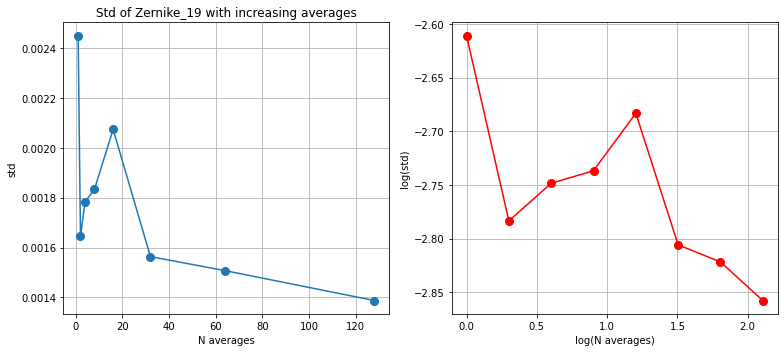

Standard deviation for Z_20:  [0.00488176747275179, 0.002967248637991216, 0.0024056929209071445, 0.002532581908612107, 0.002591638379503295, 0.002510794593373671, 0.0017781700956007807, 0.0019425682558333528]


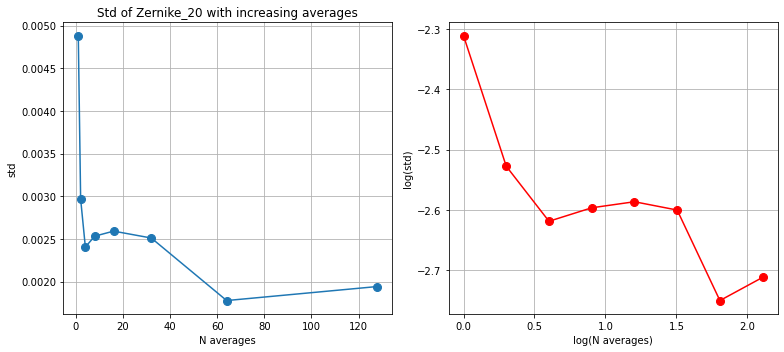

Standard deviation for Z_21:  [0.0017865976848257027, 0.0012696481550906731, 0.0011649296527210464, 0.0010533335542376072, 0.0010750665468355295, 0.0011232548031313038, 0.0011149987543590451, 0.0007386557011882864]


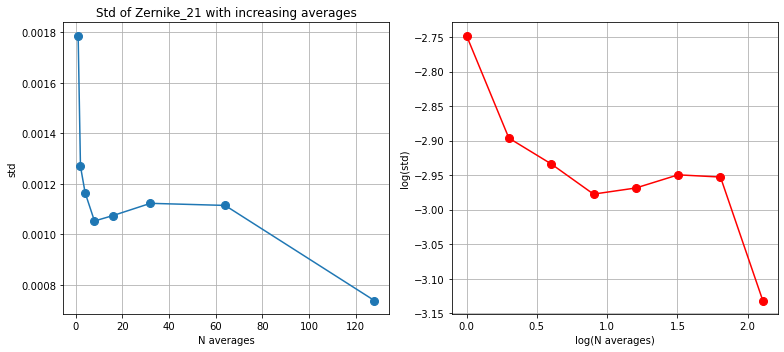

Standard deviation for Z_22:  [0.00109096444620245, 0.0007617667577536454, 0.0007120509675421668, 0.0006469082949627183, 0.0007680777423635292, 0.0007028150620514686, 0.0007809538327512638, 0.0005017316951095982]


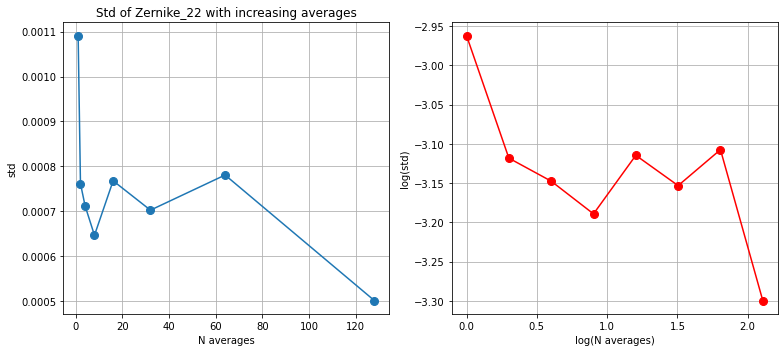

Standard deviation for Z_23:  [0.002055725420377909, 0.0013334508511094847, 0.0010647662644676624, 0.0011705741696178345, 0.001141027295134264, 0.001246384991206943, 0.0013178096304938063, 0.000931971796017148]


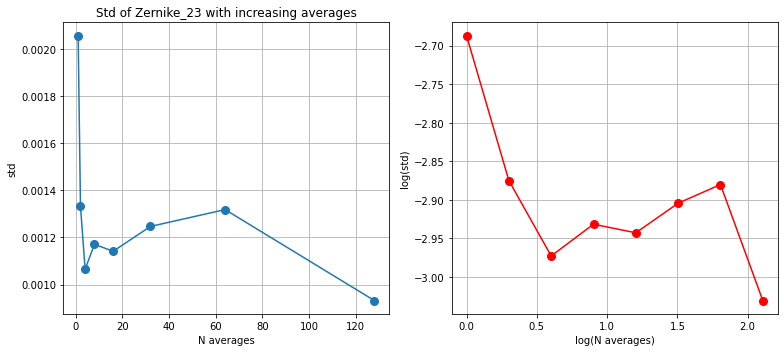

Standard deviation for Z_24:  [0.0077713407829946, 0.005311983105987843, 0.0051960372567136015, 0.005003170412881181, 0.004765797001207003, 0.004122113523518011, 0.00549353033014851, 0.002746550739543963]


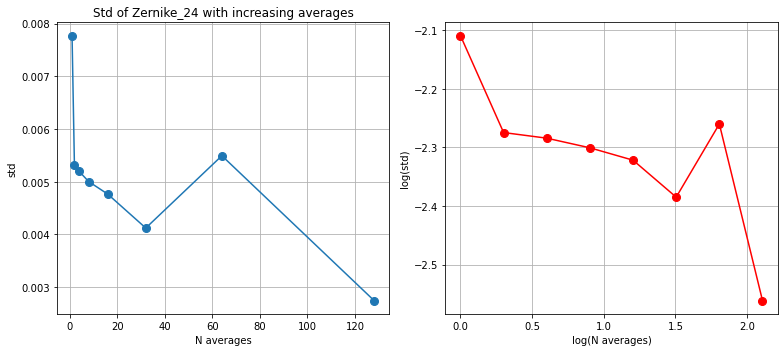

In [10]:
df = pd.read_excel("zernike_coefficients.xlsx")  # Reads the first sheet by default

for i in range(25):
    c = df.iloc[4:, i+1]
    avg = np.mean(c)
    stdd = [np.std(c)]
    N = len(c)
    data = np.copy(c)
    new_data = []
    while N>=10:
        for j in range(N//2):
            a = np.mean([c[j+4], c[N+4-(j+1)]])
            new_data.append(a)
        stdd.append(np.std(new_data))
        N = len(new_data)
        data = np.copy(new_data)
        new_data.clear()
    print(f'Standard deviation for Z_{i}: ',stdd)
    x1 = np.linspace(0,len(stdd)-1,len(stdd))
    x_axis1 = 2**x1
    fig, ax = plt.subplots(1,2, figsize=(11,5))
    ax[0].plot(x_axis1, stdd,marker='o', markersize=8)
    ax[0].grid()
    ax[0].set_title(f'Std of Zernike_{i} with increasing averages')
    ax[0].set_xlabel('N averages')
    ax[0].set_ylabel('std')
    
    ax[1].plot(np.log10(x_axis1), np.log10(stdd),marker='o', color='red', markersize=8)
    # plt.ylim(-2.0,0.0)
    ax[1].grid('True')
    ax[1].set_ylabel('log(std)')
    ax[1].set_xlabel('log(N averages)')
    plt.tight_layout()
    plt.show()

In [ ]:

# Compute frequency axis
sampling_interval = 1  # Assuming uniform spacing; adjust if needed
freqs = np.fft.fftfreq(1001, d=sampling_interval)
freqs_shifted = np.fft.fftshift(freqs)

phase_ft= np.fft.fft(rms_data1)
phase_ft_shift = np.fft.fftshift(np.abs(phase_ft))

# Plot the magnitude spectrum
plt.figure(figsize=(12, 12))
plt.plot(freqs_shifted, np.abs(phase_ft_shift), color='b')
plt.xlabel("Frequency (1/measurement)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of RMS Phase Values")
plt.grid(True)
plt.show()